Code A

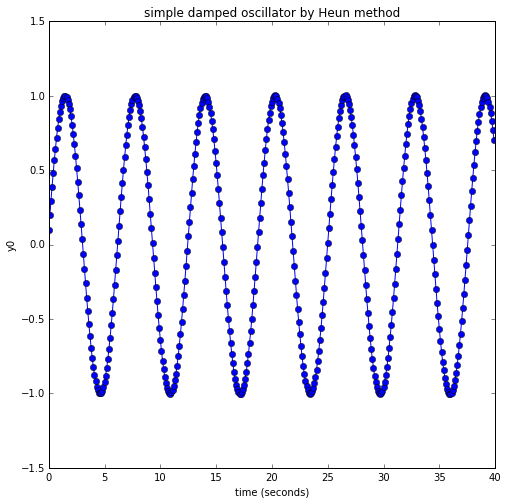

In [1]:
%matplotlib inline
import numpy as np
import json
from matplotlib import pyplot as plt
from numlabs.lab4.example.test import read_init
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator by Heun method'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

def heun(coeff, y, derivs):
  k1 = coeff.dt * derivs(coeff,y)
  k2 = coeff.dt * derivs(coeff,y+((2.0/3.0)*k1))
  ynew = y + (1.0/4.0)*k1 + (3.0/4.0)*k2
  return ynew
#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       